In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import datetime

In [2]:
df = pd.read_csv('../data/consolidated_data/training_dataset.csv')
df.drop(columns=['Unnamed: 0', "state","cases_new_capita"], inplace=True)
df["date"] = pd.to_datetime(df["date"])
df_all = df.copy()
df_all = df_all.groupby('date').sum()
df = df.groupby('date').sum()
df_var = df.copy()

In [3]:
col_name = df.columns.tolist()

for col in col_name:
    for i in range(1, 3):
        df[f"{col}_lag_{i}"] = df[col].shift(i)

pd.set_option('display.max_columns', None)

df.dropna(inplace=True)

print(df.shape)
print(df)

for col in col_name:
    for i in range(1, 3):
        df_all[f"{col}_lag_{i}"] = df_all[col].shift(i)

pd.set_option('display.max_columns', None)

df_all.dropna(inplace=True)


(1546, 75)
            cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                            
2020-01-27          0                0             4            0           0   
2020-01-28          0                0             4            0           0   
2020-01-29          3                0             7            3           0   
2020-01-30          1                0             8            1           0   
2020-01-31          0                0             8            0           0   
...               ...              ...           ...          ...         ...   
2024-04-16        110               44          7736           21           1   
2024-04-17        125               40          7821           20           0   
2024-04-18        134               31          7924           12           0   
2024-04-19        135               21          8038           20           1   
2024-04-20       

In [4]:
split_index = int(0.8 * len(df))
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

pd.set_option('display.max_columns', None)

split_index = int(0.5 * len(df_all))
train_data_all = df_all.iloc[:split_index]
test_data_all = df_all.iloc[split_index:]

print("Training data shape:", train_data_all.shape)
print("Testing data shape:", test_data_all.shape, test_data_all)

Training data shape: (773, 75)
Testing data shape: (773, 75)             cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                            
2022-03-10      30787            26457        314427         4429         668   
2022-03-11      32800            24444        322707         4756         769   
2022-03-12      26250            25089        323791         3545         692   
2022-03-13      22535            25356        320883         3207         502   
2022-03-14      22030            33872        308949         3109         547   
...               ...              ...           ...          ...         ...   
2024-04-16        110               44          7736           21           1   
2024-04-17        125               40          7821           20           0   
2024-04-18        134               31          7924           12           0   
2024-04-19        135               21          

In [5]:
df.head()

,cases_new,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80,daily_partial,daily,admitted_covid_hospital,admitted_total_hospital,discharged_covid_hospital,discharged_total_hospital,hosp_covid_hospital,icu_covid,vent_covid,cases_new_lag_1,cases_new_lag_2,cases_recovered_lag_1,cases_recovered_lag_2,cases_active_lag_1,cases_active_lag_2,cases_unvax_lag_1,cases_unvax_lag_2,cases_pvax_lag_1,cases_pvax_lag_2,cases_fvax_lag_1,cases_fvax_lag_2,cases_0_4_lag_1,cases_0_4_lag_2,cases_5_11_lag_1,cases_5_11_lag_2,cases_12_17_lag_1,cases_12_17_lag_2,cases_18_29_lag_1,cases_18_29_lag_2,cases_30_39_lag_1,cases_30_39_lag_2,cases_40_49_lag_1,cases_40_49_lag_2,cases_50_59_lag_1,cases_50_59_lag_2,cases_60_69_lag_1,cases_60_69_lag_2,cases_70_79_lag_1,cases_70_79_lag_2,cases_80_lag_1,cases_80_lag_2,daily_partial_lag_1,daily_partial_lag_2,daily_lag_1,daily_lag_2,admitted_covid_hospital_lag_1,admitted_covid_hospital_lag_2,admitted_total_hospital_lag_1,admitted_total_hospital_lag_2,discharged_covid_hospital_lag_1,discharged_covid_hospital_lag_2,discharged_total_hospital_lag_1,discharged_total_hospital_lag_2,hosp_covid_hospital_lag_1,hosp_covid_hospital_lag_2,icu_covid_lag_1,icu_covid_lag_2,vent_covid_lag_1,vent_covid_lag_2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-27,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,96.0,176.0,80.0,144.0,448.0,32.0,16.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,96.0,176.0,176.0,80.0,80.0,144.0,144.0,448.0,448.0,32.0,32.0,16.0,16.0
2020-01-28,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,96.0,176.0,80.0,144.0,448.0,32.0,16.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,96.0,176.0,176.0,80.0,80.0,144.0,144.0,448.0,448.0,32.0,32.0,16.0,16.0
2020-01-29,3,0,7,3,0,0,1,0,0,0,1,0,1,0,0,0,0.0,0.0,96.0,176.0,80.0,144.0,448.0,32.0,16.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,96.0,176.0,176.0,80.0,80.0,144.0,144.0,448.0,448.0,32.0,32.0,16.0,16.0
2020-01-30,1,0,8,1,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,96.0,176.0,80.0,144.0,448.0,32.0,16.0,3.0,0.0,0.0,0.0,7.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,96.0,176.0,176.0,80.0,80.0,144.0,144.0,448.0,448.0,32.0,32.0,16.0,16.0
2020-01-31,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,96.0,176.0,80.0,144.0,448.0,32.0,16.0,1.0,3.0,0.0,0.0,8.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,96.0,176.0,176.0,80.0,80.0,144.0,144.0,448.0,448.0,32.0,32.0,16.0,16.0


In [6]:
training_data_x = train_data.drop(columns=col_name)
training_data_y = train_data[col_name]

test_data_x = test_data.drop(columns=col_name)
test_data_y = test_data[col_name]

training_data_x_all = train_data_all.drop(columns=col_name)
training_data_y_all = train_data_all[col_name]

test_data_x_all = test_data_all.drop(columns=col_name)
test_data_y_all = test_data_all[col_name]

print(test_data_x_all.columns)
print(test_data_y_all.columns)

Index(['cases_new_lag_1', 'cases_new_lag_2', 'cases_recovered_lag_1',
       'cases_recovered_lag_2', 'cases_active_lag_1', 'cases_active_lag_2',
       'cases_unvax_lag_1', 'cases_unvax_lag_2', 'cases_pvax_lag_1',
       'cases_pvax_lag_2', 'cases_fvax_lag_1', 'cases_fvax_lag_2',
       'cases_0_4_lag_1', 'cases_0_4_lag_2', 'cases_5_11_lag_1',
       'cases_5_11_lag_2', 'cases_12_17_lag_1', 'cases_12_17_lag_2',
       'cases_18_29_lag_1', 'cases_18_29_lag_2', 'cases_30_39_lag_1',
       'cases_30_39_lag_2', 'cases_40_49_lag_1', 'cases_40_49_lag_2',
       'cases_50_59_lag_1', 'cases_50_59_lag_2', 'cases_60_69_lag_1',
       'cases_60_69_lag_2', 'cases_70_79_lag_1', 'cases_70_79_lag_2',
       'cases_80_lag_1', 'cases_80_lag_2', 'daily_partial_lag_1',
       'daily_partial_lag_2', 'daily_lag_1', 'daily_lag_2',
       'admitted_covid_hospital_lag_1', 'admitted_covid_hospital_lag_2',
       'admitted_total_hospital_lag_1', 'admitted_total_hospital_lag_2',
       'discharged_covid_hospita

In [7]:
print(test_data_y[:5])

            cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                            
2023-06-16        594              651         17971           58           2   
2023-06-17        400              630         17741           42           2   
2023-06-18        366              462         17645           39           2   
2023-06-19        284              542         17385           38           1   
2023-06-20        416              655         17143           55           2   

            cases_fvax  cases_0_4  cases_5_11  cases_12_17  cases_18_29  \
date                                                                      
2023-06-16          80         12          20           22          153   
2023-06-17          53          6           9           15          120   
2023-06-18          68          4          15           19           68   
2023-06-19          51          7           9           1

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

model = LinearRegression()

model.fit(training_data_x, training_data_y)

pred_linearregression = model.predict(test_data_x) 
  
mse = mean_squared_error(test_data_y, pred_linearregression)
mae = mean_absolute_error(test_data_y, pred_linearregression)
r2 = r2_score(test_data_y, pred_linearregression)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_linearregression[:3], "actual values: ", test_data_y[:3])

Mean Squared Error:  2787312.353443445
Mean Absolute Error:  307.3156636767513
R Square Score:  -1671.0005877356898
predicted values:  [[ 6.28432530e+02  1.22210383e+03  1.74350323e+04  4.49824126e+01
   3.46219837e+01  1.36270846e+02  1.44759942e+01  2.29895546e+01
   3.16777708e+01  1.50237299e+02  1.68070259e+02  1.06365007e+02
   5.32469956e+01  2.50487665e+01  2.55770185e+01  3.21599585e+01
  -8.98471017e+02 -1.42979556e+03  9.19219996e+01  1.91355841e+02
   7.60726059e+01  1.73320539e+02  3.04510206e+02  1.21304911e+01
   8.46868145e+00]
 [ 5.47293503e+02  1.13955101e+03  1.73752782e+04  5.21097219e+01
   1.95057668e+01  5.35377058e+01  8.24022178e+00  9.95699290e+00
   2.03963599e+01  1.34199779e+02  1.53238894e+02  1.00306467e+02
   4.14371921e+01  2.25026198e+01  2.19418490e+01  2.79229867e+01
   1.85785255e+03  2.96520465e+03  9.39995915e+01  1.75559284e+02
   7.40512523e+01  1.59845976e+02  2.68505674e+02  1.20214358e+01
   7.35280141e+00]
 [ 5.76515593e+02  1.30963209e+03  

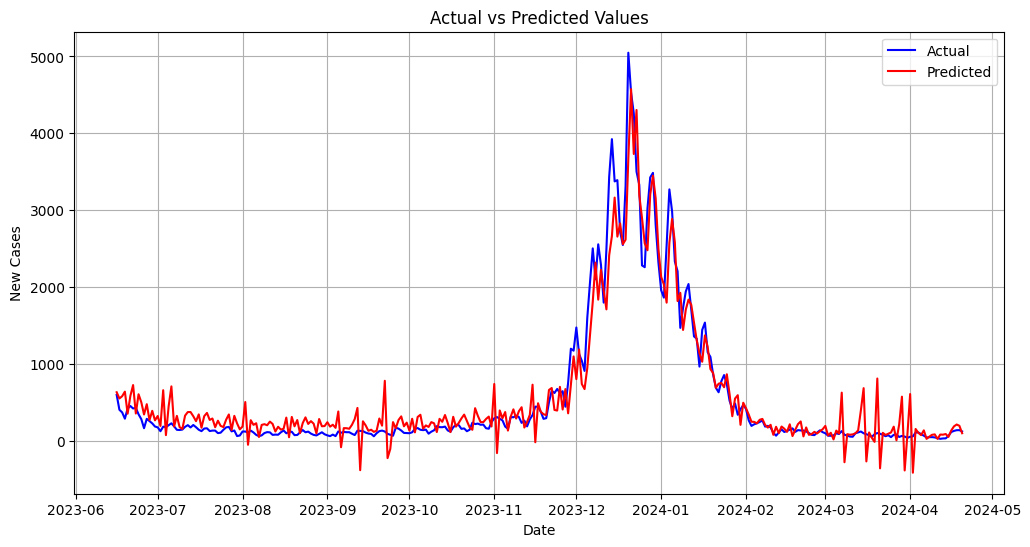

In [9]:
import matplotlib.pyplot as plt

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_linearregression[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=200, random_state=50)
forest_model.fit(training_data_x, training_data_y)

pred_randomforest = forest_model.predict(test_data_x) 
  
mse = mean_squared_error(test_data_y.values, pred_randomforest)
mae = mean_absolute_error(test_data_y.values, pred_randomforest)
r2 = r2_score(test_data_y.values, pred_randomforest)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_randomforest[:5], "actual values: ", test_data_y[:5].values)

Mean Squared Error:  135788.08756452904
Mean Absolute Error:  171.99786322580647
R Square Score:  -23.29512118846177
predicted values:  [[5.3388500e+02 4.9211500e+02 1.7813275e+04 6.2755000e+01 2.5900000e+00
  9.3465000e+01 1.2040000e+01 1.6055000e+01 1.9545000e+01 1.2217500e+02
  1.4035500e+02 8.4670000e+01 4.8850000e+01 3.0520000e+01 2.4125000e+01
  3.5550000e+01 2.8715000e+01 2.2691000e+02 9.4110000e+01 1.7316500e+02
  8.0015000e+01 1.5698500e+02 3.6043500e+02 1.7960000e+01 1.0365000e+01]
 [5.5366500e+02 4.9549000e+02 1.7781160e+04 6.6080000e+01 2.3050000e+00
  9.6335000e+01 1.2315000e+01 1.7255000e+01 2.0905000e+01 1.2798500e+02
  1.4586000e+02 8.7295000e+01 4.9130000e+01 3.1505000e+01 2.4920000e+01
  3.6495000e+01 3.2655000e+01 2.3783000e+02 9.5695000e+01 1.7986500e+02
  8.1250000e+01 1.6095500e+02 3.6307000e+02 1.8195000e+01 1.0710000e+01]
 [5.3632500e+02 4.1119500e+02 1.7697125e+04 6.2300000e+01 2.6600000e+00
  9.3420000e+01 1.1710000e+01 1.5795000e+01 1.9820000e+01 1.2448000e+0

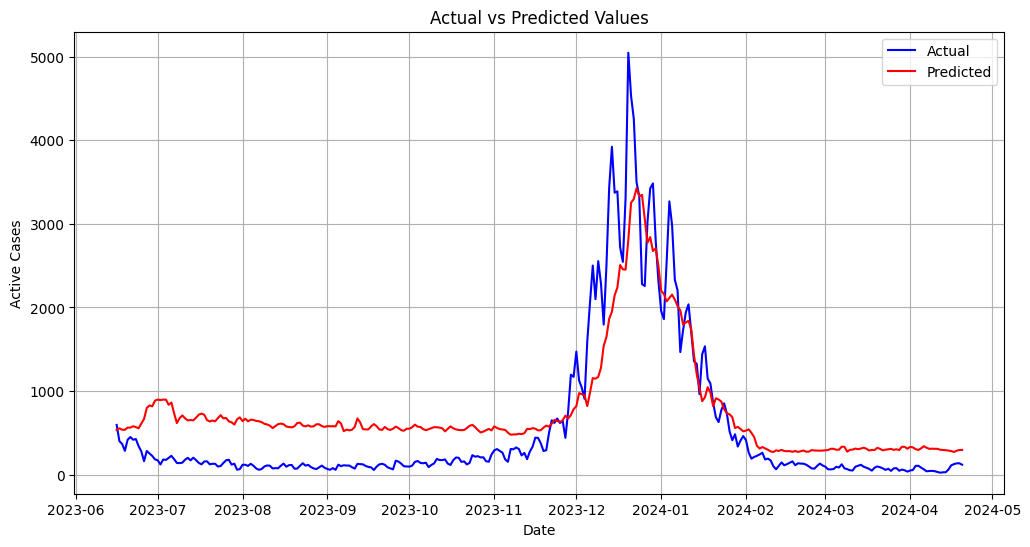

In [11]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_randomforest[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [12]:
print(col_name)

['cases_new', 'cases_recovered', 'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80', 'daily_partial', 'daily', 'admitted_covid_hospital', 'admitted_total_hospital', 'discharged_covid_hospital', 'discharged_total_hospital', 'hosp_covid_hospital', 'icu_covid', 'vent_covid']


In [13]:
data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

print(result_df)

               cases_new  cases_recovered  cases_active   cases_unvax  \
2024-04-21  9.466815e+01     3.910753e+02  7.737587e+03 -4.048780e+00   
2024-04-22  1.942819e+02     7.897179e+02  7.363538e+03  3.369252e+01   
2024-04-23 -1.297179e+01     3.072102e+03  4.936495e+03 -1.932909e+01   
2024-04-24  3.399032e+02     1.223672e+04 -3.250530e+03  2.414014e+02   
2024-04-25  7.708875e+02     4.434491e+04 -3.384856e+04  7.875587e+02   
...                  ...              ...           ...           ...   
2024-07-16  3.585212e+49     1.648881e+51 -1.546147e+51  3.233159e+49   
2024-07-17  1.325475e+50     6.096017e+51 -5.716201e+51  1.195319e+50   
2024-07-18  4.900365e+50     2.253736e+52 -2.113315e+52  4.419170e+50   
2024-07-19  1.811696e+51     8.332202e+52 -7.813059e+52  1.633795e+51   
2024-07-20  6.697953e+51     3.080467e+53 -2.888537e+53  6.040243e+51   

              cases_pvax    cases_fvax     cases_0_4    cases_5_11  \
2024-04-21  3.933589e+00 -9.391293e+00 -1.143342e+00 

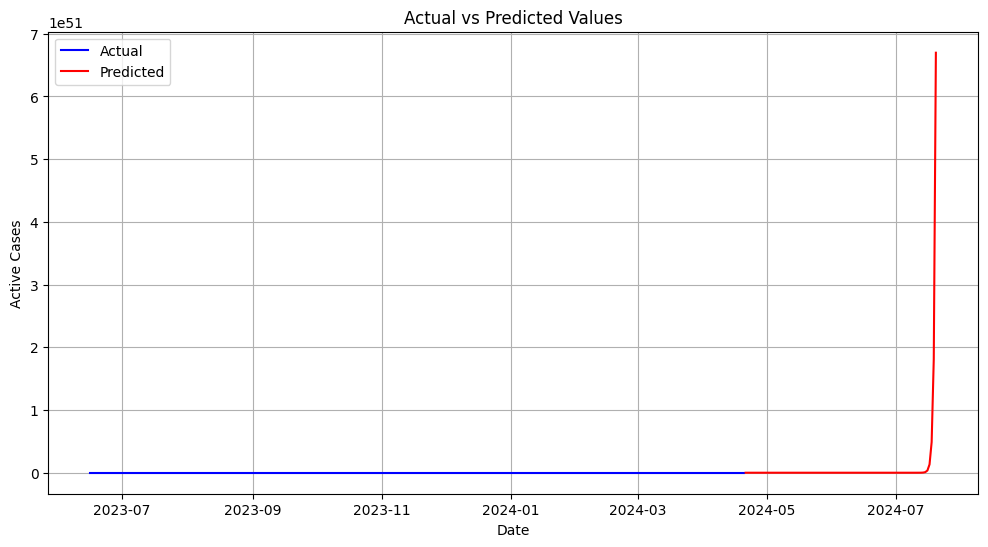

In [14]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [15]:
data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = forest_model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = forest_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-20", periods=days + 1, freq='D')

print(result_df)

            cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
2024-04-20    294.765          401.185      7972.905      109.045       1.075   
2024-04-21    318.630          383.600      8078.155       70.110       1.600   
2024-04-22    333.745          320.200      8346.385       41.130       2.370   
2024-04-23    358.095          356.290      8497.660       39.270       2.900   
2024-04-24    374.265          370.270      8513.915       39.615       3.050   
...               ...              ...           ...          ...         ...   
2024-07-15    759.990          752.735     11803.335       75.055       3.135   
2024-07-16    759.990          752.735     11803.335       75.055       3.135   
2024-07-17    759.990          752.735     11803.335       75.055       3.135   
2024-07-18    759.990          752.735     11803.335       75.055       3.135   
2024-07-19    759.990          752.735     11803.335       75.055       3.135   

            cases_fvax  cas

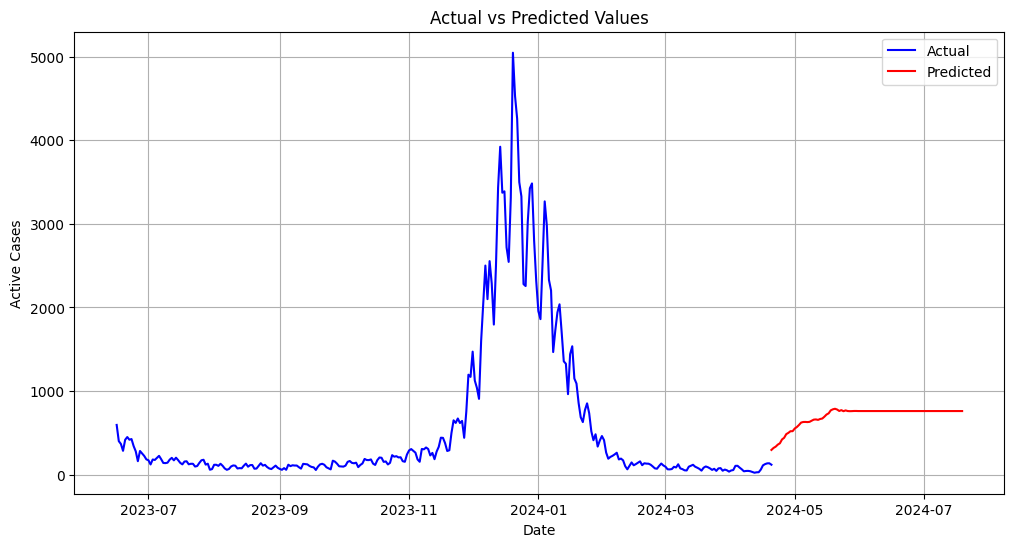

In [16]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [17]:
from datetime import date

d0 = date(2023, 6, 16)
d1 = date(2024, 4, 20)
delta = d1 - d0
print(delta.days)

data = df.loc[df.index.get_level_values('date') == "2023-06-16"]
data = data.drop(columns=col_name)

days = delta.days

result = []

next_day = forest_model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][col_name.index(col)]
        count = count + 1
    
    next_day = forest_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2023-06-16", periods=days + 1, freq='D')

print(result_df)

309
            cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
2023-06-16    533.885          492.115     17813.275       62.755       2.590   
2023-06-17    509.580          558.000     18088.440       58.970       2.675   
2023-06-18    549.620          456.310     17750.370       65.150       2.520   
2023-06-19    515.900          513.780     18125.580       61.875       2.520   
2023-06-20    542.900          454.490     17769.260       64.060       2.495   
...               ...              ...           ...          ...         ...   
2024-04-16    516.030          510.770     18140.160       63.010       2.410   
2024-04-17    547.260          458.020     17769.760       64.515       2.535   
2024-04-18    516.730          510.920     18141.790       63.290       2.370   
2024-04-19    547.855          456.975     17770.000       64.515       2.565   
2024-04-20    516.030          510.770     18140.160       63.010       2.410   

            cases_fvax 

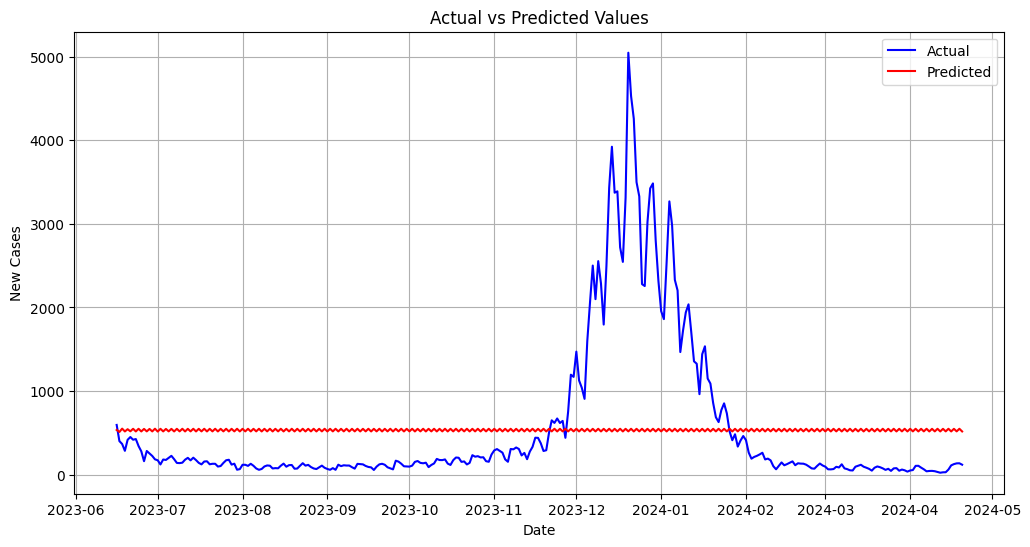

In [18]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

training_data_x_2023 = training_data_x.loc['2023-01-01':'2023-12-31']
training_data_y_2023 = training_data_y.loc['2023-01-01':'2023-12-31']

model_linear_2023 = LinearRegression()

model_linear_2023.fit(training_data_x_2023, training_data_y_2023)

pred_linearregression_2023 = model.predict(test_data_x) 
  
mse = mean_squared_error(test_data_y, pred_linearregression_2023)
mae = mean_absolute_error(test_data_y, pred_linearregression_2023)
r2 = r2_score(test_data_y, pred_linearregression_2023)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_linearregression_2023[:5], "actual values: ", test_data_y[:5].values)

Mean Squared Error:  2787312.353443445
Mean Absolute Error:  307.3156636767513
R Square Score:  -1671.0005877356898
predicted values:  [[ 6.28432530e+02  1.22210383e+03  1.74350323e+04  4.49824126e+01
   3.46219837e+01  1.36270846e+02  1.44759942e+01  2.29895546e+01
   3.16777708e+01  1.50237299e+02  1.68070259e+02  1.06365007e+02
   5.32469956e+01  2.50487665e+01  2.55770185e+01  3.21599585e+01
  -8.98471017e+02 -1.42979556e+03  9.19219996e+01  1.91355841e+02
   7.60726059e+01  1.73320539e+02  3.04510206e+02  1.21304911e+01
   8.46868145e+00]
 [ 5.47293503e+02  1.13955101e+03  1.73752782e+04  5.21097219e+01
   1.95057668e+01  5.35377058e+01  8.24022178e+00  9.95699290e+00
   2.03963599e+01  1.34199779e+02  1.53238894e+02  1.00306467e+02
   4.14371921e+01  2.25026198e+01  2.19418490e+01  2.79229867e+01
   1.85785255e+03  2.96520465e+03  9.39995915e+01  1.75559284e+02
   7.40512523e+01  1.59845976e+02  2.68505674e+02  1.20214358e+01
   7.35280141e+00]
 [ 5.76515593e+02  1.30963209e+03  

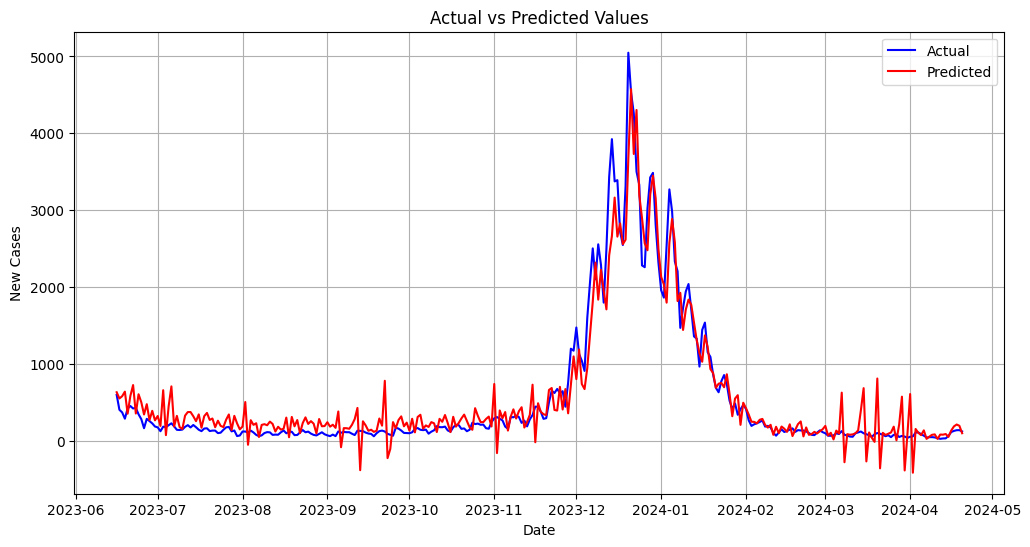

In [20]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_linearregression_2023[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

In [21]:
from datetime import date

d0 = date(2023, 6, 16)
d1 = date(2024, 4, 20)
delta = d1 - d0
print(delta.days)

data = df.loc[df.index.get_level_values('date') == "2023-06-16"]
data = data.drop(columns=col_name)

days = delta.days

result = []

next_day = model_linear_2023.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][col_name.index(col)]
        count = count + 1
    
    next_day = forest_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2023-06-16", periods=days + 1, freq='D')

print(result_df)

309
             cases_new  cases_recovered  cases_active  cases_unvax  \
2023-06-16  478.297192       834.862148  17671.730687    53.140254   
2023-06-17  531.440000       545.720000  18105.795000    88.630000   
2023-06-18  563.565000       482.250000  17699.235000    86.120000   
2023-06-19  524.600000       524.175000  18069.310000    60.955000   
2023-06-20  549.510000       506.820000  17700.835000    64.330000   
...                ...              ...           ...          ...   
2024-04-16  516.030000       510.770000  18140.160000    63.010000   
2024-04-17  547.260000       458.020000  17769.760000    64.515000   
2024-04-18  516.730000       510.920000  18141.790000    63.290000   
2024-04-19  547.855000       456.975000  17770.000000    64.515000   
2024-04-20  516.030000       510.770000  18140.160000    63.010000   

            cases_pvax  cases_fvax  cases_0_4  cases_5_11  cases_12_17  \
2023-06-16    1.791848  100.725651  12.386005   15.346214    38.476637   
2023-06

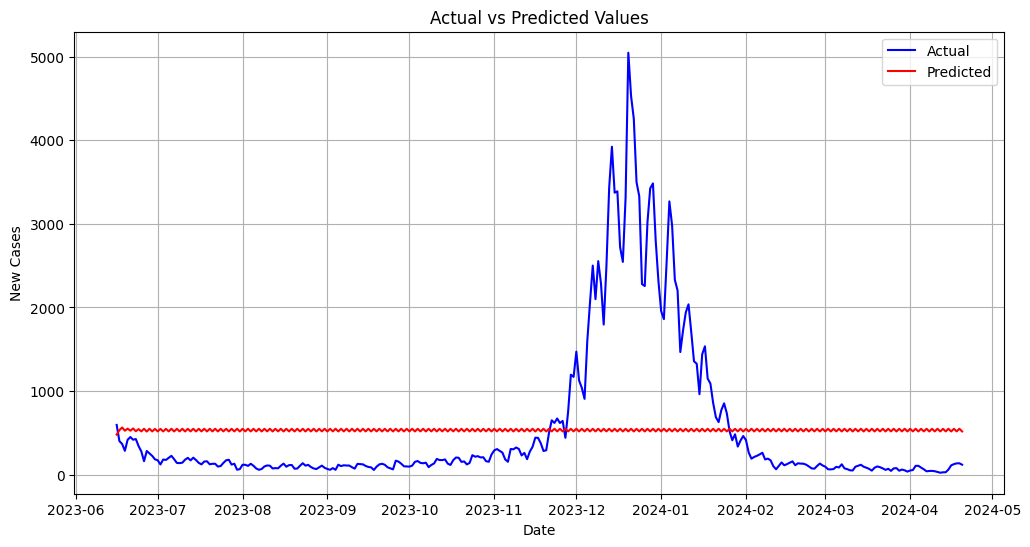

In [22]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

In [23]:
from statsmodels.tsa.api import VAR

split_index = int(0.8 * len(df))
train_data_var = df_var.iloc[:split_index]
test_data_var = df_var.iloc[split_index:]

d0 = date(2023, 6, 14)
d1 = date(2024, 4, 20)
delta = d1 - d0
days = delta.days

model_var = VAR(train_data_var)
model_var = model_var.fit(maxlags=10)

prediction = model_var.forecast(model_var.endog, steps=days+1)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2023-06-14", periods=days+1, freq='D'), columns=col_name)

mse = mean_squared_error(test_data_var, forecast_df)
mae = mean_absolute_error(test_data_var, forecast_df)
r2 = r2_score(test_data_var, forecast_df)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)


Mean Squared Error:  4495427.287696281
Mean Absolute Error:  749.7596610746564
R Square Score:  -4213.387602327216


C:\Users\kelvi\PycharmProjects\MachineLearningTutorial\5011-cem-ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


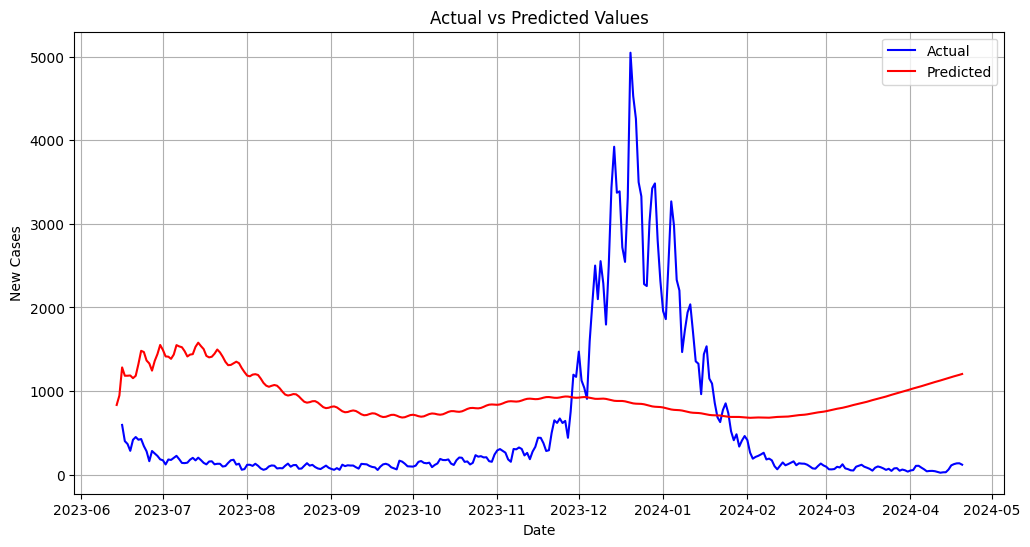

In [24]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

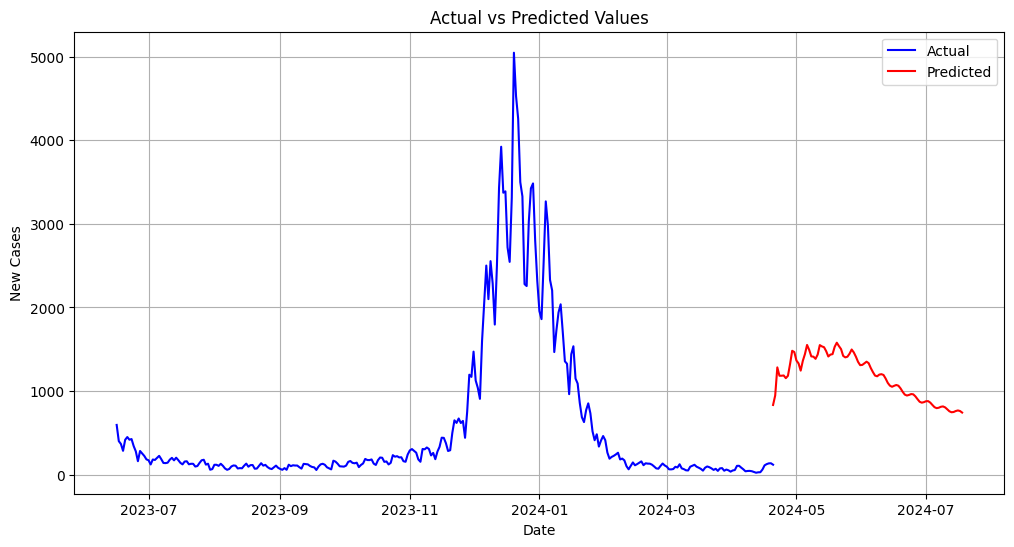

In [25]:
prediction = model_var.forecast(model_var.endog, steps=90)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2024-04-20", periods=90, freq='D'), columns=col_name)

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

Mean Squared Error:  15014859.66002637
Mean Absolute Error:  740.5295703720518
Root Mean Squared Error:  1181.4487030287
R Square Score:  0.6729915441841113
predicted values:  [[3.06675291e+04 2.92603162e+04 3.11477473e+05 4.64989807e+03
  6.32868583e+02 9.06396634e+03 1.73413802e+03 1.82533996e+03
  1.27640833e+03 8.25258997e+03 7.30745326e+03 4.23148498e+03
  2.76533978e+03 1.96072788e+03 8.92062630e+02 3.31997279e+02
  1.19382889e+04 6.85875436e+04 1.97585524e+03 2.50808940e+03
  1.69186130e+03 2.11068707e+03 7.45485604e+03 4.03205420e+02
  2.39432872e+02]] actual values:              cases_new_lag_1  cases_new_lag_2  cases_recovered_lag_1  \
date                                                                  
2022-03-10          30246.0          31490.0                26653.0   

            cases_recovered_lag_2  cases_active_lag_1  cases_active_lag_2  \
date                                                                        
2022-03-10                29035.0            3101

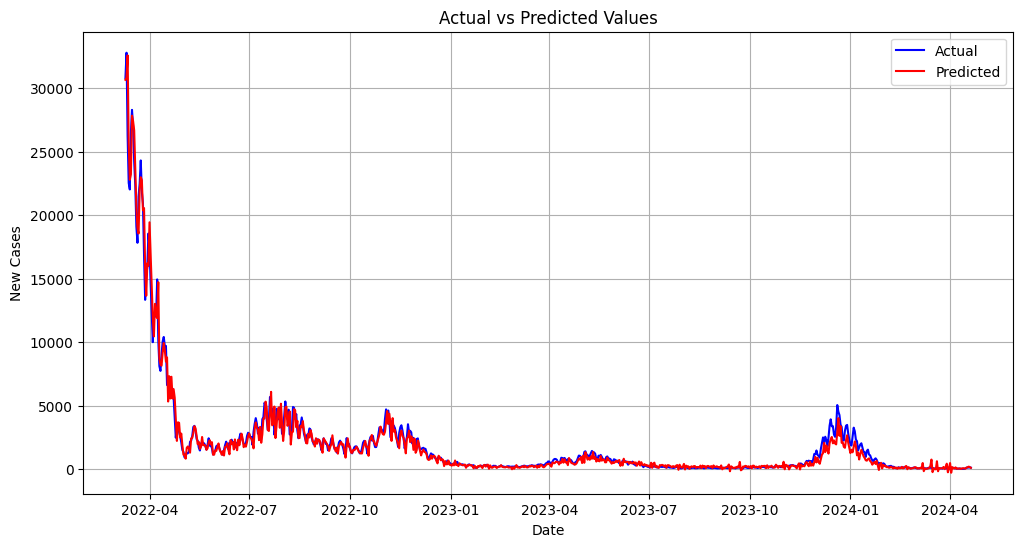

In [26]:
import pickle
from sklearn.metrics import root_mean_squared_error
model_linearregression_all = LinearRegression()

model_linearregression_all.fit(training_data_x_all, training_data_y_all)
'''
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model_linearregression_all, file)
'''
pred_linearregression_all = model_linearregression_all.predict(test_data_x_all) 
  
mse = mean_squared_error(test_data_y_all, pred_linearregression_all)
mae = mean_absolute_error(test_data_y_all, pred_linearregression_all)
r2 = r2_score(test_data_y_all, pred_linearregression_all)
rmse = root_mean_squared_error(test_data_y_all, pred_linearregression_all)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R Square Score: ", r2)

print("predicted values: ",pred_linearregression_all[:1], "actual values: ", test_data_x_all[:1])

actual_df = pd.DataFrame({"date": test_data_y_all.index, "cases_new": test_data_y_all["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_linearregression_all[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

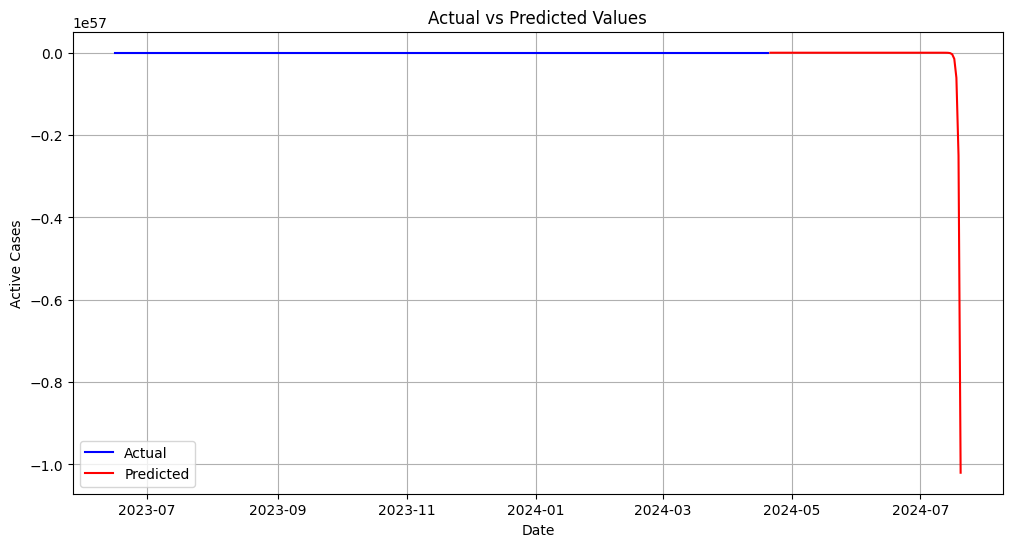

In [27]:
data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = model_linearregression_all.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = model_linearregression_all.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

Mean Squared Error:  701552704.1990258
Mean Absolute Error:  5345.319232858997
Root Mean Squared Error:  6570.377158090895
R Square Score:  -4.39173149445445
predicted values:  [[2.97164050e+04 2.84958850e+04 3.07289575e+05 4.30553500e+03
  6.11855000e+02 9.37756000e+03 1.67960000e+03 1.86328500e+03
  1.27416500e+03 8.04859000e+03 7.10704500e+03 4.07261000e+03
  2.64629000e+03 1.78181500e+03 8.37285000e+02 3.16265000e+02
  2.17839450e+04 6.87331350e+04 1.89969000e+03 2.44183500e+03
  1.55487500e+03 1.98821500e+03 7.41606000e+03 3.79635000e+02
  2.24180000e+02]] actual values:              cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                            
2022-03-10      30787            26457        314427         4429         668   

            cases_fvax  cases_0_4  cases_5_11  cases_12_17  cases_18_29  \
date                                                                      
2022-03-10        9082

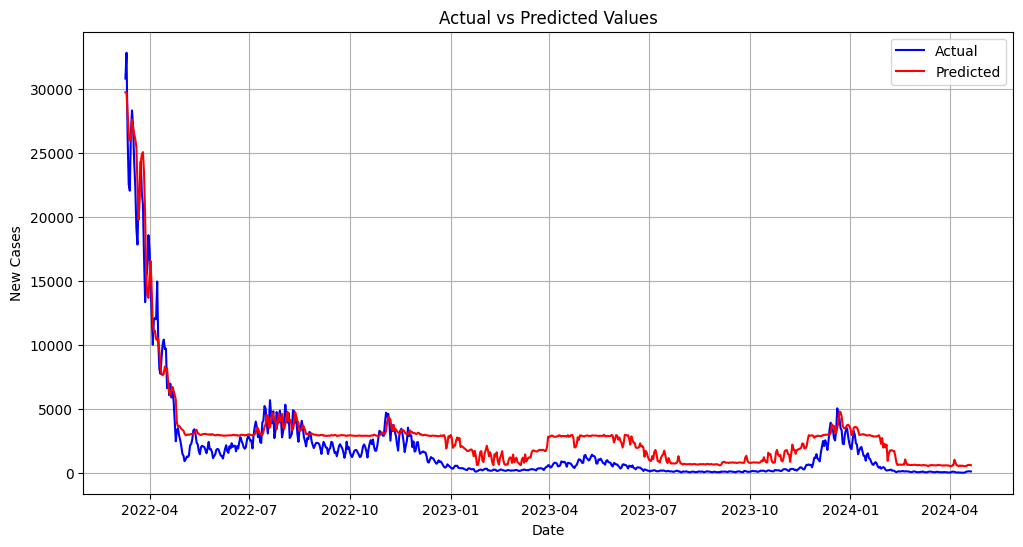

In [28]:
forest_model_all = RandomForestRegressor(n_estimators=200, random_state=50)
forest_model_all.fit(training_data_x_all, training_data_y_all)
'''
with open("random_forest_regression_model.pkl", "wb") as file:
    pickle.dump(forest_model_all, file)
'''
pred_randomforest_all = forest_model_all.predict(test_data_x_all) 
  
mse = mean_squared_error(test_data_y_all, pred_randomforest_all)
mae = mean_absolute_error(test_data_y_all, pred_randomforest_all)
r2 = r2_score(test_data_y_all, pred_randomforest_all)
rmse = root_mean_squared_error(test_data_y_all, pred_randomforest_all)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R Square Score: ", r2)

print("predicted values: ",pred_randomforest_all[:1], "actual values: ", test_data_y_all[:1])

actual_df = pd.DataFrame({"date": test_data_y_all.index, "cases_new": test_data_y_all["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_randomforest_all[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

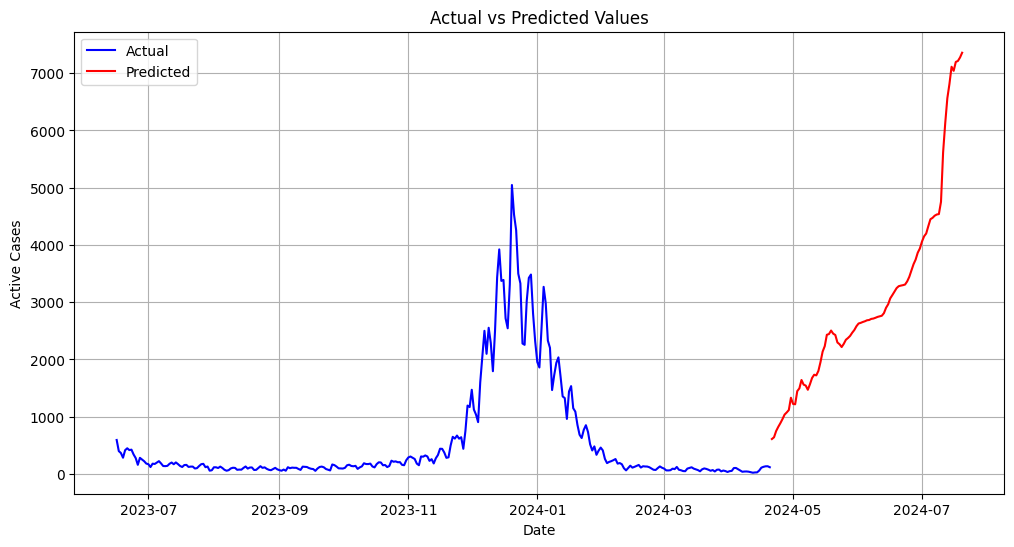

In [29]:
data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = forest_model_all.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = forest_model_all.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

C:\Users\kelvi\PycharmProjects\MachineLearningTutorial\5011-cem-ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error:  5.025176095928911e+33
Mean Absolute Error:  7083890625881887.0
Root Mean Squared Error:  6570.377158090895
R Square Score:  -5.511227684592176e+25


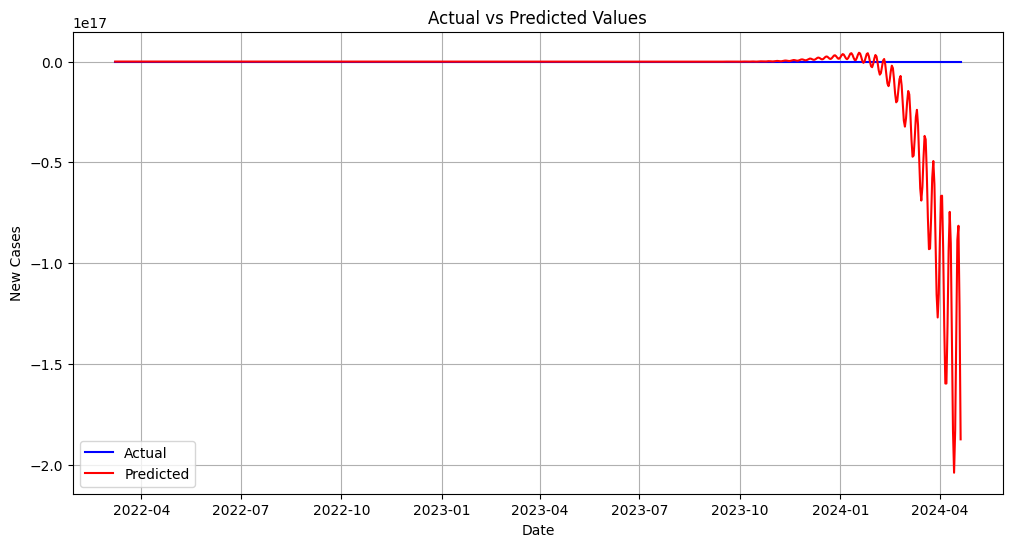

In [30]:
split_index = int(0.5 * len(df_all))
train_data_var = df_var.iloc[:split_index]
test_data_var = df_var.iloc[split_index:]

d0 = date(2022, 3, 8)
d1 = date(2024, 4, 20)
delta = d1 - d0
days = delta.days

model_var = VAR(train_data_var)
model_var = model_var.fit(maxlags=10)
'''
with open('VAR_model.pkl', 'wb') as file:
    pickle.dump(model_var, file)
'''
prediction = model_var.forecast(model_var.endog, steps=days+1)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2022-03-08", periods=days+1, freq='D'), columns=col_name)

mse = mean_squared_error(test_data_var, forecast_df)
mae = mean_absolute_error(test_data_var, forecast_df)
r2 = r2_score(test_data_var, forecast_df)
rmse = root_mean_squared_error(test_data_y_all, pred_randomforest_all)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R Square Score: ", r2)

actual_df = pd.DataFrame({"date": test_data_var.index, "cases_new": test_data_var["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()


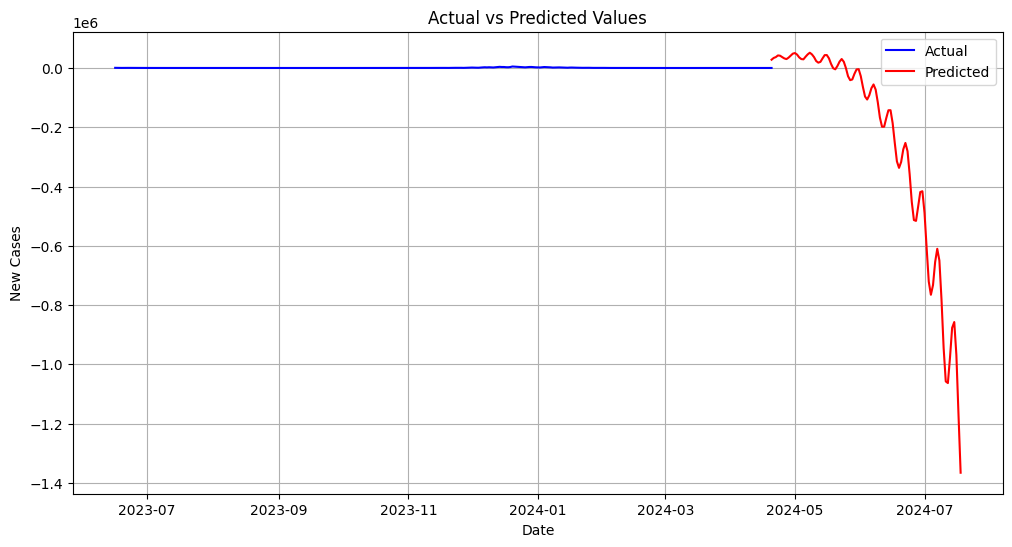

In [31]:
prediction = model_var.forecast(model_var.endog, steps=90)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2024-04-20", periods=90, freq='D'), columns=col_name)

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

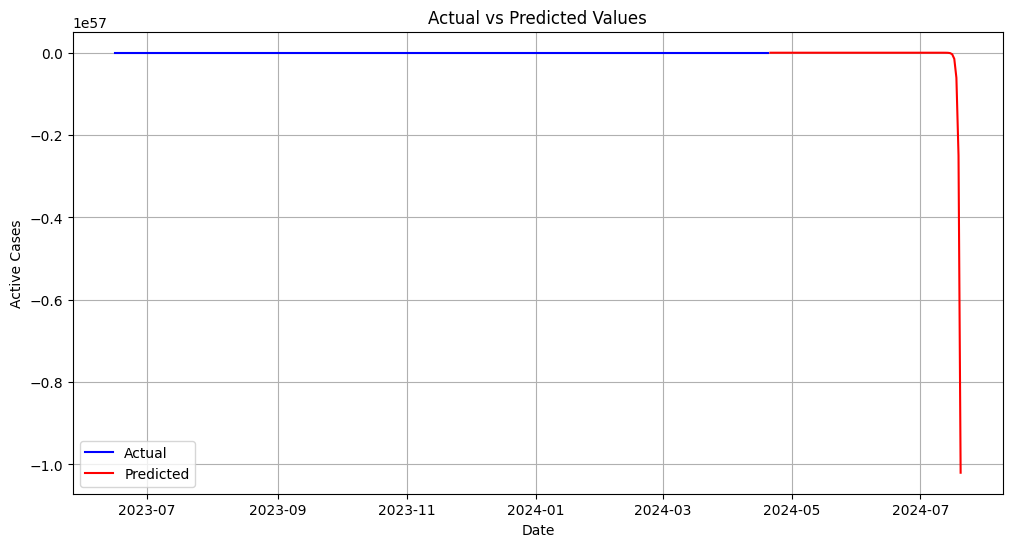

In [32]:
with open('linear_regression_model.pkl', 'rb') as file:
    linear_regression_model = pickle.load(file)

data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = linear_regression_model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = linear_regression_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

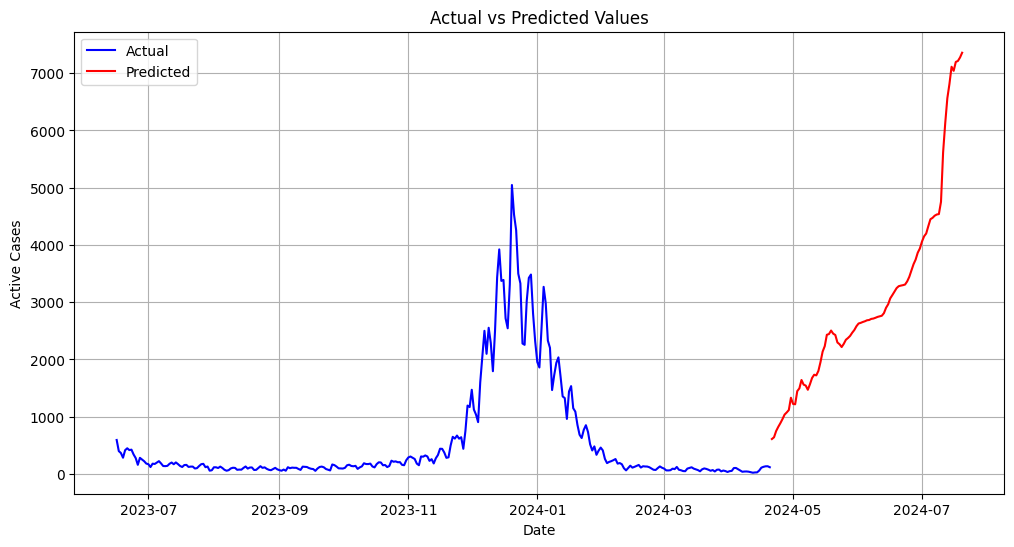

In [33]:
with open('random_forest_regression_model.pkl', 'rb') as file:
    random_forest_model = pickle.load(file)

data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = random_forest_model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = random_forest_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

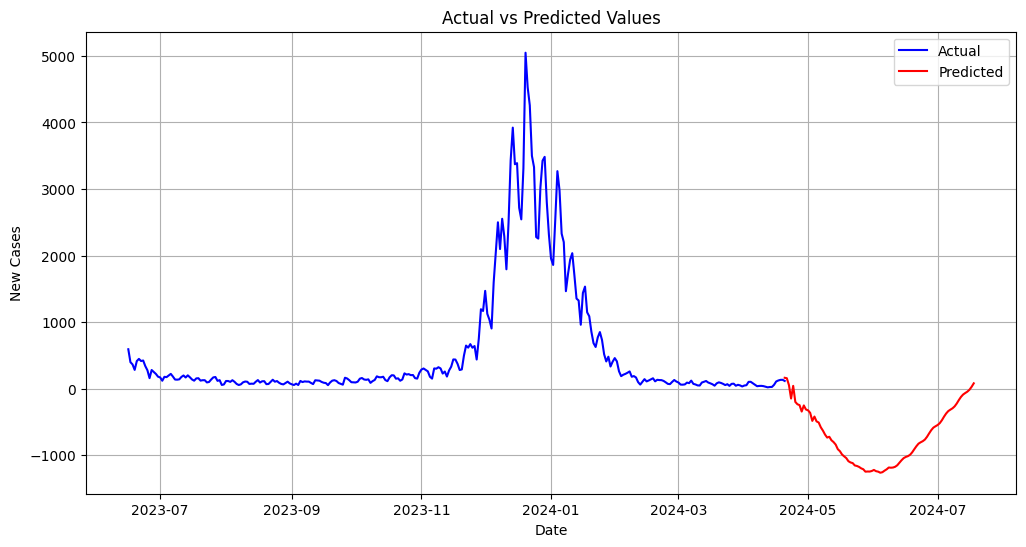

In [34]:
with open('VAR_model.pkl', 'rb') as file:
    var_model = pickle.load(file)

prediction = var_model.forecast(var_model.endog, steps=90)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2024-04-20", periods=90, freq='D'), columns=col_name)

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()